
# **Support Vector Machine (SVM) Assignment**
---
## **Q1. SVM Classifier on IRIS Dataset (Linear Kernel)**

We use the Iris dataset, apply a linear kernel SVM using scikit-learn, and visualize the decision boundary.


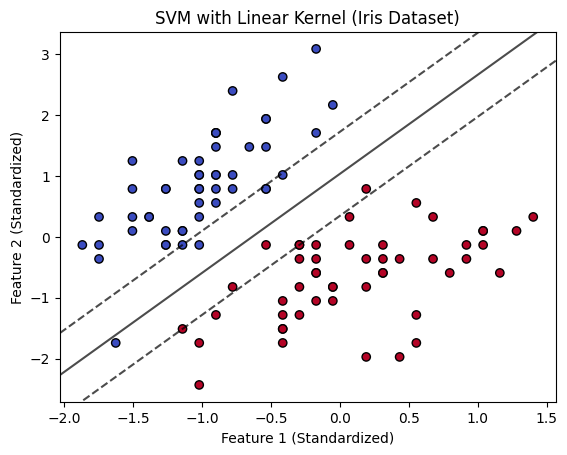

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Take first two features
y = iris.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Use only two classes for visualization
X = X[y != 2]
y = y[y != 2]

# Train linear SVM
clf = SVC(kernel='linear')
clf.fit(X, y)

# Plot points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')

# Decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1],
            alpha=0.7, linestyles=['--', '-', '--'])
plt.title("SVM with Linear Kernel (Iris Dataset)")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.show()



---
## **Q2. Simple Two-Class SVM Classifier**

We use six points (3 positive, 3 negative) and train a linear SVM using scikit-learn.


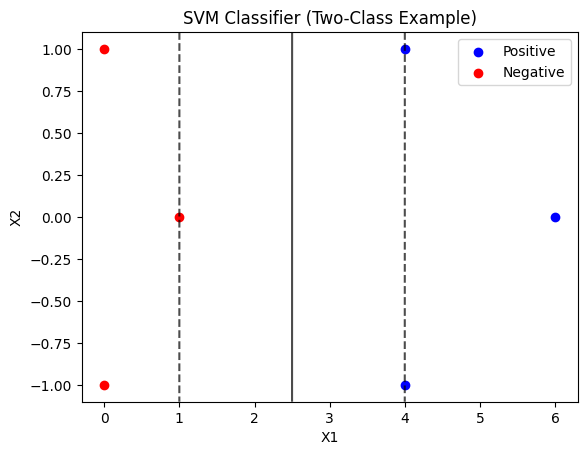

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Given data
X = np.array([[4, 1], [4, -1], [6, 0], [1, 0], [0, 1], [0, -1]])
y = np.array([1, 1, 1, -1, -1, -1])

# Train SVM
clf = SVC(kernel='linear')
clf.fit(X, y)

# Plot
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='b', label='Positive')
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='r', label='Negative')

# Decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1],
            alpha=0.7, linestyles=['--', '-', '--'])
plt.legend()
plt.title("SVM Classifier (Two-Class Example)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()



---
## **Q3. Manual SVM Separator (Without scikit-learn)**

Here we manually separate the two classes by visually estimating the hyperplane.


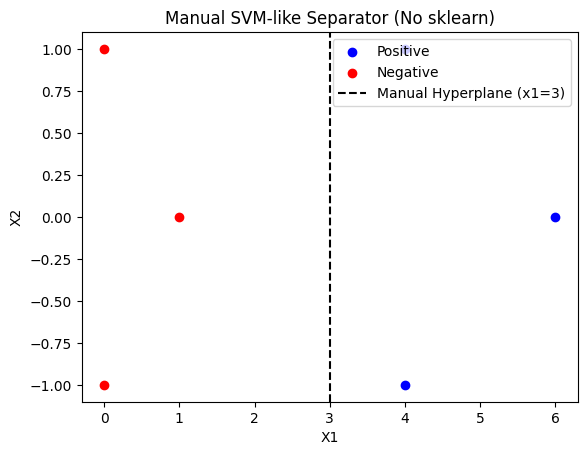

In [3]:

import numpy as np
import matplotlib.pyplot as plt

# Data
X_pos = np.array([[4, 1], [4, -1], [6, 0]])
X_neg = np.array([[1, 0], [0, 1], [0, -1]])

# Manual separator (roughly at x1 = 3)
plt.scatter(X_pos[:, 0], X_pos[:, 1], color='b', label='Positive')
plt.scatter(X_neg[:, 0], X_neg[:, 1], color='r', label='Negative')
plt.axvline(x=3, color='k', linestyle='--', label='Manual Hyperplane (x1=3)')
plt.legend()
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Manual SVM-like Separator (No sklearn)")
plt.show()



---
## **Q4. Plot Hyperplane: 1 + 2X₁ + 3X₂ = 0**

We also show the regions for which the expression is greater than, less than, or equal to zero.


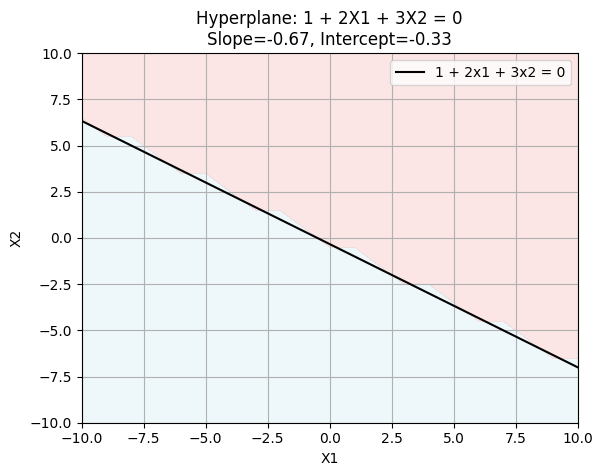

In [4]:

import numpy as np
import matplotlib.pyplot as plt

x1 = np.arange(-10, 11, 1)
x2 = (-1 - 2*x1)/3

# Slope and intercept
slope = -2/3
intercept = -1/3

plt.plot(x1, x2, 'k-', label='1 + 2x1 + 3x2 = 0')

# Regions
X1, X2 = np.meshgrid(x1, x1)
Z = 1 + 2*X1 + 3*X2
plt.contourf(X1, X2, Z > 0, alpha=0.2, colors=['lightblue', 'lightcoral'])
plt.xlabel("X1")
plt.ylabel("X2")
plt.title(f"Hyperplane: 1 + 2X1 + 3X2 = 0\nSlope={slope:.2f}, Intercept={intercept:.2f}")
plt.legend()
plt.grid(True)
plt.show()



---
## **Q5. Compare Two Hyperplanes**

We compare:
- Classifier 1: 5 + 2x₁ + 5x₂ = 0  
- Classifier 2: 5 + 20x₁ + 50x₂ = 0


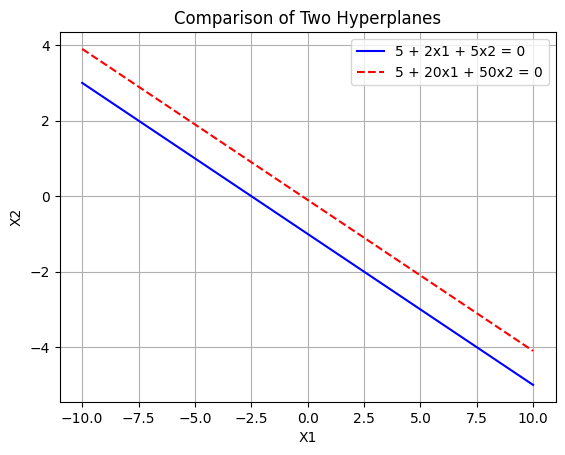

Slope (a): -0.4, Intercept (a): -1
Slope (b): -0.4, Intercept (b): -0.1


In [5]:

import numpy as np
import matplotlib.pyplot as plt

x1 = np.arange(-10, 11, 1)

# Hyperplane 1
x2_a = (-5 - 2*x1)/5
slope_a = -2/5
intercept_a = -1

# Hyperplane 2
x2_b = (-5 - 20*x1)/50
slope_b = -20/50
intercept_b = -0.1

plt.plot(x1, x2_a, 'b-', label='5 + 2x1 + 5x2 = 0')
plt.plot(x1, x2_b, 'r--', label='5 + 20x1 + 50x2 = 0')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Comparison of Two Hyperplanes")
plt.legend()
plt.grid(True)
plt.show()

print(f"Slope (a): {slope_a}, Intercept (a): {intercept_a}")
print(f"Slope (b): {slope_b}, Intercept (b): {intercept_b}")
